### You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.
### In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modelling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

In [1]:
import io
import pandas as pd


In [2]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')
import matplotlib.pyplot

In [3]:
import pandas as pd
df_stores=pd.read_csv('F:/analytix_labs/2. Walmart Store Sales Forecasting/data/stores.csv')
df_train=pd.read_csv('F:/analytix_labs/2. Walmart Store Sales Forecasting/data/train.csv')
df_test=pd.read_csv('F:/analytix_labs/2. Walmart Store Sales Forecasting/data/test.csv')
df_features=pd.read_csv('F:/analytix_labs/2. Walmart Store Sales Forecasting/data/features.csv')
df_smple_sub=pd.read_csv('F:/analytix_labs/2. Walmart Store Sales Forecasting/data/sampleSubmission.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
df_sales=pd.concat([df_train,df_test], ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
df_sales=pd.merge(df_sales, df_features, how = 'left', left_on = ['Date','Store'],right_on = ['Date','Store'])

In [7]:
df_sales=pd.merge(df_sales, df_stores, how = 'left', left_on = 'Store',right_on = 'Store')

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 17 columns):
Date            536634 non-null object
Dept            536634 non-null int64
IsHoliday_x     536634 non-null bool
Store           536634 non-null int64
Weekly_Sales    421570 non-null float64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
IsHoliday_y     536634 non-null bool
Type            536634 non-null object
Size            536634 non-null int64
dtypes: bool(2), float64(10), int64(3), object(2)
memory usage: 66.5+ MB


In [9]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [10]:
df_sales['week_num']=df_sales.Date.apply(lambda x: x.weekofyear)

In [11]:
df_sales['super_bowl']=np.where(df_sales['Date'].isin(['2010-02-10','2011-02-11','2012-02-10','2013-02-08']),1,0)


In [12]:
df_sales['labor_day']=np.where(df_sales['Date'].isin(['2010-09-10','2011-09-09','2012-09-07','2013-09-06']),1,0)

In [13]:
df_sales['thanksgiving']=np.where(df_sales['Date'].isin(['2010-11-26','2011-11-25','2012-11-23','2013-11-29']),1,0)

In [14]:
df_sales['christmas']=np.where(df_sales['Date'].isin(['2010-12-31','2011-12-30','2012-12-28','2013-12-27']),1,0)

In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 22 columns):
Date            536634 non-null datetime64[ns]
Dept            536634 non-null int64
IsHoliday_x     536634 non-null bool
Store           536634 non-null int64
Weekly_Sales    421570 non-null float64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
IsHoliday_y     536634 non-null bool
Type            536634 non-null object
Size            536634 non-null int64
week_num        536634 non-null int64
super_bowl      536634 non-null int32
labor_day       536634 non-null int32
thanksgiving    536634 non-null int32
christmas       536634 non-null int32
dtypes: bool(2), datetime

In [16]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 22 columns):
Date            536634 non-null datetime64[ns]
Dept            536634 non-null int64
IsHoliday_x     536634 non-null bool
Store           536634 non-null int64
Weekly_Sales    421570 non-null float64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
IsHoliday_y     536634 non-null bool
Type            536634 non-null object
Size            536634 non-null int64
week_num        536634 non-null int64
super_bowl      536634 non-null int32
labor_day       536634 non-null int32
thanksgiving    536634 non-null int32
christmas       536634 non-null int32
dtypes: bool(2), datetime

In [17]:
sales_cont=df_sales[['Weekly_Sales','Size','Temperature','CPI','Unemployment','Fuel_Price']]

In [18]:
sales_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 6 columns):
Weekly_Sales    421570 non-null float64
Size            536634 non-null int64
Temperature     536634 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
Fuel_Price      536634 non-null float64
dtypes: float64(5), int64(1)
memory usage: 28.7 MB


In [19]:
sales_cat=df_sales[['Dept','Store','IsHoliday_x','Type','week_num','super_bowl','labor_day','thanksgiving','christmas']]

In [20]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [21]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [22]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [23]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [24]:
sales_cont.apply(continuous_var_summary)

,Weekly_Sales,Size,Temperature,CPI,Unemployment,Fuel_Price
N,4.215700e+05,5.366340e+05,5.366340e+05,4.984720e+05,4.984720e+05,5.366340e+05
NMISS,1.150640e+05,0.000000e+00,0.000000e+00,3.816200e+04,3.816200e+04,0.000000e+00
SUM,6.737219e+09,7.334636e+10,3.153893e+07,8.578229e+07,3.884038e+06,1.829015e+06
MEAN,1.598126e+04,1.366786e+05,5.877176e+01,1.720905e+02,7.791888e+00,3.408310e+00
MEDIAN,7.612030e+03,1.401670e+05,6.006000e+01,1.824424e+02,7.795000e+00,3.523000e+00
STD,2.271118e+04,6.100771e+04,1.867872e+01,3.954215e+01,1.865076e+00,4.308613e-01
VAR,5.157979e+08,3.721941e+09,3.488944e+02,1.563582e+03,3.478508e+00,1.856414e-01
MIN,-4.988940e+03,3.487500e+04,-7.290000e+00,1.260640e+02,3.684000e+00,2.472000e+00
P1,5.000000e+00,3.487500e+04,1.687000e+01,1.261140e+02,4.077000e+00,2.572000e+00
P5,5.997450e+01,3.969000e+04,2.649000e+01,1.266019e+02,5.114000e+00,2.671000e+00


In [25]:
sales_cat.apply(categorical_var_summary)

,Dept,Store,IsHoliday_x,Type,week_num,super_bowl,labor_day,thanksgiving,christmas
N,536634.00,536634.00,536634,536634,536634.00,536634.00,536634.00,536634.00,536634.00
NMISS,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00
MODE,1.00,13.00,False,A,7.00,0.00,0.00,0.00,0.00
FREQ,8190.00,13310.00,498045,274191,11913.00,527731.00,527773.00,527699.00,527700.00
PERCENT,1.53,2.48,92.81,51.09,2.22,98.34,98.35,98.33,98.34


In [26]:
sales_cont = sales_cont.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.95)))

In [27]:
sales_cont = sales_cont.apply(missing_imputation)

In [28]:
sales_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 6 columns):
Weekly_Sales    536634 non-null float64
Size            536634 non-null int64
Temperature     536634 non-null float64
CPI             536634 non-null float64
Unemployment    536634 non-null float64
Fuel_Price      536634 non-null float64
dtypes: float64(5), int64(1)
memory usage: 28.7 MB


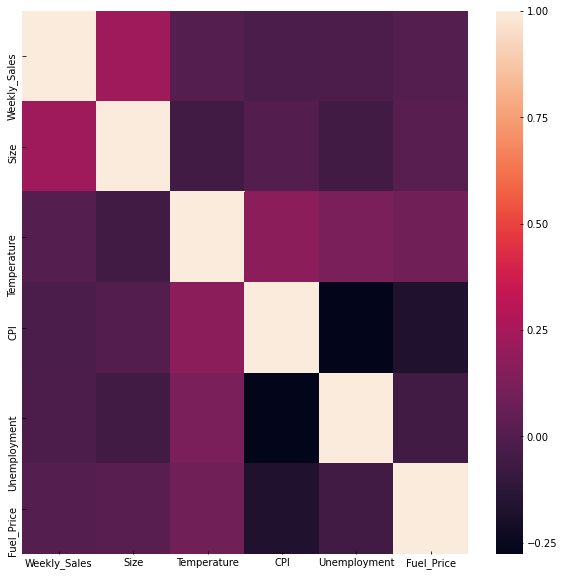

In [29]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(sales_cont.corr())
plt.show()

In [30]:
# for c_feature in categorical_features
for c_feature in list(sales_cat.columns):
    sales_cat[c_feature] = sales_cat[c_feature].astype('category')
    sales_cat = create_dummies(sales_cat, c_feature)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
sales_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Columns: 182 entries, Dept_2 to christmas_1
dtypes: uint8(182)
memory usage: 97.2 MB


In [32]:
sales_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Columns: 182 entries, Dept_2 to christmas_1
dtypes: uint8(182)
memory usage: 97.2 MB


In [33]:
sales_new=pd.concat([sales_cont,sales_cat], axis = 1)

1.6729055068808758

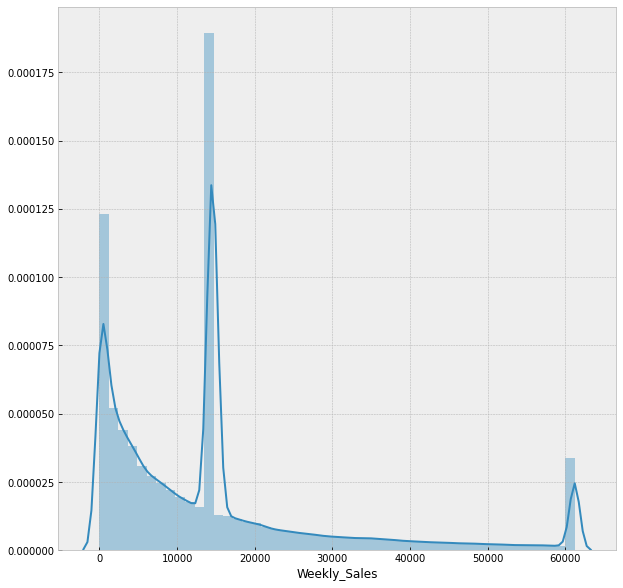

In [34]:
plt.figure(figsize= (10,10))
sns.distplot(sales_new['Weekly_Sales'])
sales_new['Weekly_Sales'].skew()

-1.640348487213313

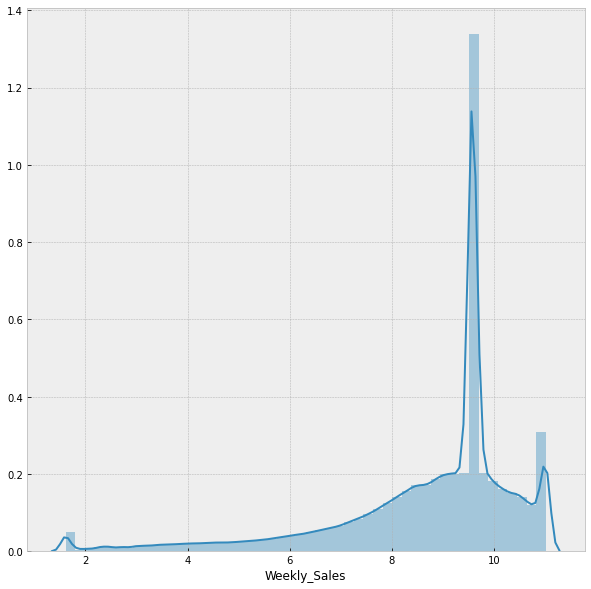

In [35]:
plt.figure(figsize= (10,10))
sns.distplot(np.log(sales_new['Weekly_Sales']))
np.log(sales_new['Weekly_Sales']).skew()

-0.14113856826232904

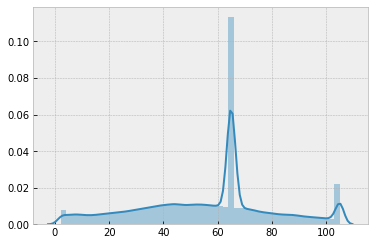

In [57]:
from scipy import stats
box_tran,box_lambda=stats.boxcox(sales_new['Weekly_Sales'])
sns.distplot(pd.Series(box_tran))
pd.Series(box_tran).skew()

In [76]:
#sales_new['Weekly_Sales_box']=pd.Series(box_tran)
sales_new['Weekly_Sales_box']=np.log(sales_new['Weekly_Sales'])

In [38]:
feature_col=sales_new.loc[:,sales_new.columns.difference(['Weekly_Sales','Weekly_Sales_box'])]
target=sales_new['Weekly_Sales_box']

**F_ Regression for significant variables**

In [40]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(feature_col, target )

In [42]:
f_reg_results = pd.DataFrame(zip(list(feature_col.columns),F_values.round(3), p_values.round(3)),columns=['Variable','F_Value', 'P_Value'])

In [45]:
f_reg_results['Var_Sig']=np.where(f_reg_results.P_Value <= 0.1 , 'Sig', 'Insig')
l_feature=list(f_reg_results.Variable[f_reg_results['Var_Sig'] ==  'Sig'])

In [47]:
model_param='Weekly_Sales_box ~ ' + ' + '.join(l_feature)

In [48]:
model_param

'Weekly_Sales_box ~ CPI + Dept_10 + Dept_11 + Dept_12 + Dept_13 + Dept_14 + Dept_16 + Dept_17 + Dept_18 + Dept_19 + Dept_2 + Dept_20 + Dept_21 + Dept_22 + Dept_23 + Dept_24 + Dept_25 + Dept_26 + Dept_27 + Dept_28 + Dept_29 + Dept_30 + Dept_31 + Dept_32 + Dept_33 + Dept_34 + Dept_35 + Dept_36 + Dept_37 + Dept_38 + Dept_39 + Dept_4 + Dept_40 + Dept_41 + Dept_42 + Dept_43 + Dept_44 + Dept_45 + Dept_46 + Dept_47 + Dept_48 + Dept_49 + Dept_5 + Dept_50 + Dept_51 + Dept_52 + Dept_54 + Dept_55 + Dept_56 + Dept_58 + Dept_59 + Dept_6 + Dept_60 + Dept_65 + Dept_67 + Dept_7 + Dept_71 + Dept_72 + Dept_74 + Dept_77 + Dept_78 + Dept_79 + Dept_8 + Dept_80 + Dept_81 + Dept_82 + Dept_83 + Dept_85 + Dept_87 + Dept_9 + Dept_90 + Dept_91 + Dept_92 + Dept_93 + Dept_94 + Dept_95 + Dept_96 + Dept_97 + Dept_98 + Dept_99 + Fuel_Price + IsHoliday_x_True + Size + Store_10 + Store_11 + Store_12 + Store_13 + Store_14 + Store_15 + Store_16 + Store_17 + Store_18 + Store_19 + Store_2 + Store_20 + Store_21 + Store_22 +

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [46]:
model_param='''Weekly_Sales_box ~ CPI + Dept_10 + Dept_11 + Dept_12 + Dept_13 + Dept_14 + Dept_16 + 
Dept_17 + Dept_18 + Dept_19 + Dept_2 + Dept_20 + Dept_21 + Dept_22 + Dept_23 + Dept_24 + Dept_25 + 
Dept_26 + Dept_27 + Dept_28 + Dept_29 + Dept_30 + Dept_31 + Dept_32 + Dept_33 + Dept_34 + Dept_35 + 
Dept_36 + Dept_37 + Dept_38 + Dept_39 + Dept_4 + Dept_40 + Dept_41 + Dept_42 + Dept_43 + Dept_44 + 
Dept_45 + Dept_46 + Dept_47 + Dept_48 + Dept_49 + Dept_5 + Dept_50 + Dept_51 + Dept_52 + Dept_54 + 
Dept_55 + Dept_56 + Dept_58 + Dept_59 + Dept_6 + Dept_60 + Dept_65 + Dept_67 + Dept_7 + Dept_71 + 
Dept_72 + Dept_74 + Dept_77 + Dept_78 + Dept_79 + Dept_8 + Dept_80 + Dept_81 + Dept_82 + Dept_83 + 
Dept_85 + Dept_87 + Dept_9 + Dept_90 + Dept_91 + Dept_92 + Dept_93 + Dept_94 + Dept_95 + Dept_96 + 
Dept_97 + Dept_98 + Dept_99 + Fuel_Price  + Size + Store_10 + Store_11 + Store_12 + 
Store_13 + Store_14 + Store_15 + Store_16 + Store_17 + Store_18 + Store_19 + Store_2 + Store_20 + Store_21 + 
Store_22 + Store_23 + Store_24 + Store_25 + Store_27 + Store_28 + Store_29 + Store_3 + Store_31 + 
Store_32 + Store_33 + Store_34 + Store_36 + Store_37 + Store_38 + Store_39 + Store_4 + Store_40 + Store_41 + 
Store_42 + Store_43 + Store_44 + Store_45 + Store_5 + Store_6 + Store_7 + Store_9 + Temperature   + 
Unemployment + super_bowl_1  + week_num_13 + week_num_14 + week_num_18 + 
week_num_2 + week_num_21 + week_num_22 + week_num_23 + week_num_24 + week_num_25 + week_num_26 + week_num_27 + week_num_3 + 
week_num_31 + week_num_32 + week_num_33 + week_num_34 + week_num_35   + week_num_39 + 
week_num_4 + week_num_40  + week_num_44 + week_num_45 + week_num_46  + 
week_num_48 + week_num_49 + week_num_50 + week_num_51 + week_num_7'''

In [68]:

# separate the Y and X variables
y, X = dmatrices(model_param,sales_new, return_type = 'dataframe')

In [69]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,883.0
1,CPI,8.4
2,Dept_10,1.5
3,Dept_11,1.5
4,Dept_12,1.5
...,...,...
150,week_num_48,1.0
151,week_num_49,1.1
152,week_num_50,1.1
153,week_num_51,1.1


In [71]:
vif.to_excel('F:/analytix_labs/2. Walmart Store Sales Forecasting/vif.xlsx')

### Implemeting Linear Regression Stats model

In [77]:
### Train test spilt
### using statsmodels.formula.api
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
train, test = train_test_split(sales_new, test_size = 0.3, random_state = 1234)

In [78]:
lm1 = smf.ols(model_param, train).fit()

In [79]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       Weekly_Sales_box   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2726.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:26:07   Log-Likelihood:            -6.2377e+05
No. Observations:              375643   AIC:                         1.248e+06
Df Residuals:                  375489   BIC:                         1.250e+06
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.7617      0.060    163.853   

In [50]:
#from scipy.special import boxcox, inv_boxcox

In [80]:
#train['Weekly_Sales_pred']=inv_boxcox(lm1.predict(train),box_lambda)
train['Weekly_Sales_pred']=np.exp(lm1.predict(train))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
#test['Weekly_Sales_pred'] = inv_boxcox(lm1.predict(test),box_lambda)
test['Weekly_Sales_pred']=np.exp(lm1.predict(test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
RMSE_train = np.sqrt(mean_squared_error(train.Weekly_Sales ,train.Weekly_Sales_pred)).round(3)
RMSE_test = np.sqrt(mean_squared_error(test.Weekly_Sales,test.Weekly_Sales_pred)).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  12424.102  |  RMSE of testing data:  12444.209


In [87]:
Corr_train = stats.stats.pearsonr(train.Weekly_Sales ,train.Weekly_Sales_pred)
Corr_test = stats.stats.pearsonr(test.Weekly_Sales ,test.Weekly_Sales_pred)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.6697798749738987, 0.0)  |  Correlation of testing data:  (0.6682139270410448, 0.0)


In [89]:
MAPE_train = '%.3f' % np.mean(np.abs(train.Weekly_Sales - train.Weekly_Sales_pred)/train.Weekly_Sales)
MAPE_test = '%.3f' % np.mean(np.abs(test.Weekly_Sales - test.Weekly_Sales_pred)/test.Weekly_Sales)

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  6.287  |  MAPE of testing data:  6.442


In [91]:
train[['Weekly_Sales','Weekly_Sales_pred']]

,Weekly_Sales,Weekly_Sales_pred
450729,14556.784819,70012.397413
314302,8138.870000,5848.064748
452814,14556.784819,872.590743
238474,27365.280000,10233.920953
4204,1178.650000,1792.533025
...,...,...
514041,14556.784819,8686.193586
220532,813.730000,1301.672944
165158,10732.260000,10969.866787
451283,14556.784819,29686.226386


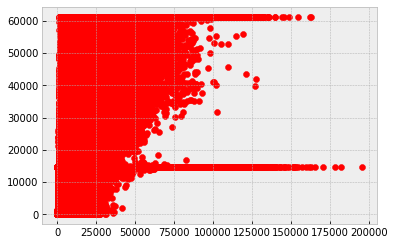

In [92]:
plt.scatter(train.Weekly_Sales_pred,train.Weekly_Sales,color ='r')
plt.show()

In [95]:
feature_new=feature_col[['CPI','Dept_10','Dept_11','Dept_12','Dept_13','Dept_14','Dept_16',
'Dept_17','Dept_18','Dept_19','Dept_2','Dept_20','Dept_21','Dept_22','Dept_23','Dept_24',
'Dept_25','Dept_26','Dept_27','Dept_28','Dept_29','Dept_30','Dept_31','Dept_32','Dept_33','Dept_34',
'Dept_35','Dept_36','Dept_37','Dept_38','Dept_39','Dept_4','Dept_40','Dept_41','Dept_42','Dept_43','Dept_44',
'Dept_45','Dept_46','Dept_47','Dept_48','Dept_49','Dept_5','Dept_50','Dept_51','Dept_52','Dept_54',
'Dept_55','Dept_56','Dept_58','Dept_59','Dept_6','Dept_60','Dept_65','Dept_67','Dept_7','Dept_71','Dept_72','Dept_74','Dept_77','Dept_78',
'Dept_79','Dept_8','Dept_80','Dept_81','Dept_82','Dept_83','Dept_85','Dept_87','Dept_9','Dept_90','Dept_91',
'Dept_92','Dept_93','Dept_94','Dept_95','Dept_96','Dept_97','Dept_98','Dept_99','Fuel_Price','Size','Store_10','Store_11','Store_12',
'Store_13','Store_14','Store_15','Store_16','Store_17','Store_18','Store_19','Store_2','Store_20','Store_21',
'Store_22','Store_23','Store_24','Store_25','Store_27','Store_28','Store_29','Store_3','Store_31','Store_32',
'Store_33','Store_34','Store_36','Store_37','Store_38','Store_39','Store_4','Store_40','Store_41',
'Store_42','Store_43','Store_44','Store_45','Store_5','Store_6','Store_7','Store_9','Temperature',
'Unemployment','super_bowl_1','week_num_13','week_num_14','week_num_18','week_num_2','week_num_21','week_num_22','week_num_23',
'week_num_24','week_num_25','week_num_26','week_num_27','week_num_3','week_num_31','week_num_32','week_num_33','week_num_34','week_num_35','week_num_39',
'week_num_4','week_num_40','week_num_44','week_num_45','week_num_46','week_num_48','week_num_49','week_num_50','week_num_51','week_num_7']]

In [128]:
### Conclusion : The error coming in Linear Regression model (MAPE,RMSE) are very high though the R2 value is quite good. 
### Hence using the features columns obainted from VIF and after manually removing insignificant variable, feeding in Randomforest
### regression

### Implementing Random forest Regressor 

In [96]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(feature_new,
                                                  sales_new['Weekly_Sales_box'],
                                                  test_size = 0.3,
                                                  random_state = 555 )

In [97]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [100]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=100, max_features=20, n_jobs=-1)

In [101]:
radm_reg.fit( train_X, train_y )

RandomForestRegressor(max_features=20, n_jobs=-1, oob_score=True)

In [104]:
radm_reg.score( train_X, train_y )

0.9902460290036075

In [105]:
radm_reg.score( test_X, test_y )

0.9416060660515464

In [110]:
radm_train_pred = pd.DataFrame( { 'actual':  np.exp(train_y),
                            'predicted': np.exp(radm_reg.predict( train_X )) } )

In [108]:
radm_test_pred = pd.DataFrame( { 'actual':  np.exp(test_y),
                            'predicted': np.exp(radm_reg.predict( test_X )) } )

In [113]:
RMSE_train = np.sqrt(mean_squared_error(radm_train_pred.actual ,radm_train_pred.predicted)).round(3)
RMSE_test = np.sqrt(mean_squared_error(radm_test_pred.actual,radm_test_pred.predicted)).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  1929.197  |  RMSE of testing data:  3833.856


In [114]:
MAPE_train = '%.3f' % np.mean(np.abs(radm_train_pred.actual - radm_train_pred.predicted)/radm_train_pred.actual)
MAPE_test = '%.3f' % np.mean(np.abs(radm_test_pred.actual - radm_test_pred.predicted)/radm_test_pred.actual)

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.097  |  MAPE of testing data:  0.465


In [115]:
Corr_train = stats.stats.pearsonr(radm_train_pred.actual ,radm_train_pred.predicted)
Corr_test = stats.stats.pearsonr(radm_test_pred.actual,radm_test_pred.predicted)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.9925716329574765, 0.0)  |  Correlation of testing data:  (0.9690420922649223, 0.0)


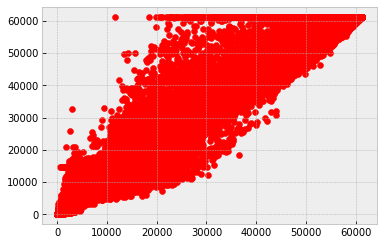

In [116]:
plt.scatter(radm_train_pred.predicted,radm_train_pred.actual ,color ='r')
plt.show()

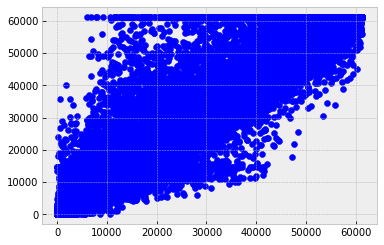

In [118]:
plt.scatter(radm_test_pred.predicted,radm_test_pred.actual ,color ='b')
plt.show()

In [119]:
feat_imp=list(zip(train_X.columns,radm_clf.feature_importances_))
#print(np.argsort(radm_clf.feature_importances_))

In [120]:
df_feat_imp=pd.DataFrame(feat_imp)

In [121]:
df_feat_imp.columns=['Features','Importance']

In [124]:
#Top 20 features
df_feat_imp.sort_values(by='Importance',ascending = False).head(20)

,Features,Importance
81,Size,0.102470
0,CPI,0.086393
123,Unemployment,0.064854
46,Dept_54,0.046245
122,Temperature,0.036583
37,Dept_45,0.035753
80,Fuel_Price,0.032330
44,Dept_51,0.029735
50,Dept_59,0.023802
52,Dept_60,0.022712


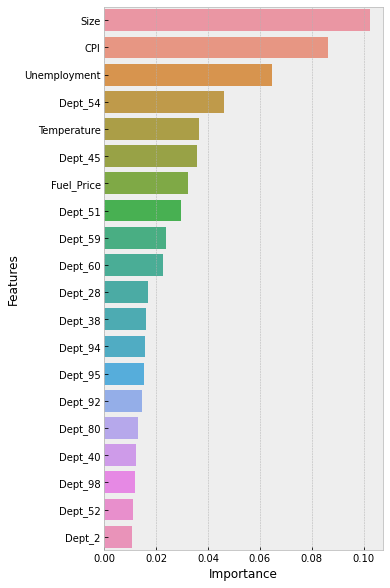

In [127]:
plt.figure(figsize=(5,10))
sns.barplot( y = 'Features', x = 'Importance', data = df_feat_imp.sort_values(by='Importance',ascending = False).head(20) )
plt.show()